In [ ]:
# Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Colab Notebooks/DATASET_DM'

Mounted at /content/gdrive


# **MÔI TRƯỜNG LẬP TRÌNH**

In [ ]:
# Thư viện sử dụng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Tải file - Groceries1
!gdown --id 1u0Lthh7TxUeb40XteSveTOyxWpXIYHCK

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1u0Lthh7TxUeb40XteSveTOyxWpXIYHCK
To: /content/Groceries 1.csv
100% 1.10M/1.10M [00:00<00:00, 126MB/s]


In [ ]:
# Đọc tập tin dữ liệu
file = r'Groceries 1.csv'
raw_df = pd.read_csv(file)
df = raw_df.copy()
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#**TIỀN XỬ LÝ DỮ LIỆU**

##***1.1. Khám phá dữ liệu***

In [ ]:
# Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
# Kiểm tra Dimension
num_rows, num_columns = df.shape
print(f'Dữ liệu có {num_rows} quan sát và {num_columns} cột thuộc tính')

Dữ liệu có 38765 quan sát và 3 cột thuộc tính


In [ ]:
# Kiểm tra tên, số giá trị unique, null và kiểu dữ liệu của cột
def properties_chk(dataframe):
    dataframe_check = pd.DataFrame({
        'Số quan sát': dataframe.count(),
        'Số giá trị unique': dataframe.nunique(),
        'Kiểu dữ liệu': dataframe.dtypes.values
    })
    return dataframe_check.style

In [ ]:
properties_chk(df)

,Số quan sát,Số giá trị unique,Kiểu dữ liệu
Member_number,38765,3898,int64
Date,38765,728,object
itemDescription,38765,167,object


##***1.2. Xử lý kiểu dữ liệu mã khách hàng***

In [ ]:
# df['Member_number'] = df['Member_number'].astype('object')

##***1.3. Xử lý dữ liệu thời gian***

In [ ]:
# Chuyển về cùng format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.tail()

,Member_number,Date,itemDescription
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice
38764,1521,2014-12-26,cat food


In [ ]:
# Kiểm tra giá trị thời gian bất thường
def set_invalid_date(date):
    try:
        pd.to_datetime(date)
        return date
    except ValueError:
        return False

In [ ]:
df['Date'] = set_invalid_date(df['Date'])
invalid_date = df[df['Date'] == False]
print(invalid_date)

Empty DataFrame
Columns: [Member_number, Date, itemDescription]
Index: []


##***1.4. Kiểm tra giá trị rỗng (null)***

In [ ]:
# Kiểm tra null của cột
def null_chk(dataframe):
    dataframe_check = pd.DataFrame({
        'Số quan sát': dataframe.count(),
        'Số giá trị rỗng': dataframe.isnull().sum(),
        'Phần trăm rỗng': (dataframe.isnull().sum() / len(dataframe)) * 100
    })
    dataframe_check['Phần trăm rỗng'] = dataframe_check['Phần trăm rỗng'].map('{:.2f}%'.format)
    return dataframe_check.style

In [ ]:
null_chk(df)

,Số quan sát,Số giá trị rỗng,Phần trăm rỗng
Member_number,38765,0,0.00%
Date,38765,0,0.00%
itemDescription,38765,0,0.00%


##***1.5. Kiểm tra trùng lặp***

In [ ]:
# Các dòng được nhận định là trùng
duplicated_df = df[df.duplicated(subset=['Member_number', 'Date', 'itemDescription'])]
duplicated_df

,Member_number,Date,itemDescription
5015,2051,2015-11-09,frankfurter
5022,3055,2015-08-18,other vegetables
5044,1994,2015-11-03,whole milk
5055,1682,2015-06-25,pip fruit
5059,4324,2015-05-01,sausage
...,...,...,...
38614,2027,2014-02-26,domestic eggs
38684,2936,2014-07-03,newspapers
38685,2311,2014-03-13,pot plants
38722,3834,2014-05-18,salty snack


In [ ]:
# Kiểm tra cụ thể một số index
specific_rows = [5015, 5022, 38722, 38723]
duplicated_specific_rows = df.loc[specific_rows, ['Member_number', 'Date', 'itemDescription']]

# Tìm các dòng trùng
duplicated_specific_df = df[df.duplicated(subset=['Member_number', 'Date', 'itemDescription'], keep=False)]

# Kiểm tra dòng trùng gốc tương ứng với dòng nào trong dataframe
matching_duplicated_df = pd.DataFrame(columns=df.columns)
for index, row in duplicated_specific_df.iterrows():
    if any(row[['Member_number', 'Date', 'itemDescription']].equals(i) for _, i in duplicated_specific_rows.iterrows()):
        matching_duplicated_df = matching_duplicated_df.append(row)

# Hiện dòng gốc và dòng bị trùng
print('Dòng dữ liệu gốc và dòng dữ liệu bị trùng:')
matching_duplicated_df

Dòng dữ liệu gốc và dòng dữ liệu bị trùng:


,Member_number,Date,itemDescription
4004,2051,2015-11-09,frankfurter
4011,3055,2015-08-18,other vegetables
5015,2051,2015-11-09,frankfurter
5022,3055,2015-08-18,other vegetables
11480,1146,2014-05-23,yogurt
16061,3055,2015-08-18,other vegetables
27628,3834,2014-05-18,salty snack
38722,3834,2014-05-18,salty snack
38723,1146,2014-05-23,yogurt


#**EDA**

##***2.1. Khám phá biến `itemDescription`***

*Top 10 item xuất hiện nhiều nhất*

In [ ]:
# Tổng số lượng loại item
item_num = df['itemDescription'].nunique()
print(f'Tập dữ liệu này có {item_num} unique items')

Tập dữ liệu này có 167 unique items


In [ ]:
# Top 10 items xuất hiện nhiều nhất
top10_item = df['itemDescription'].value_counts().head(10)
top10_item

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

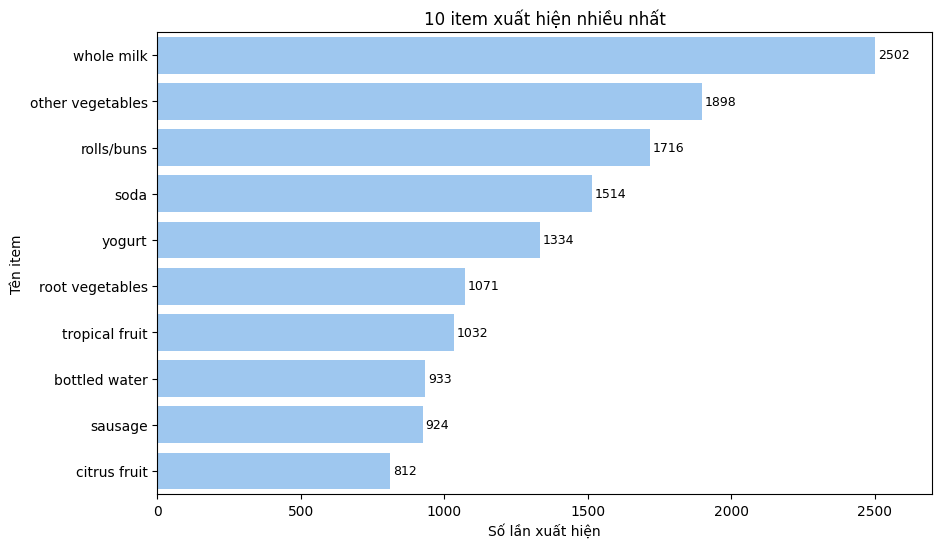

In [ ]:
# Biểu diễn trực quan
plt.figure(figsize=(10, 6))
plt.xlim(0, 2700)
chart = sns.barplot(x=top10_item.values, y=top10_item.index, alpha=0.8, color=sns.xkcd_rgb['sky blue'])
for index, value in enumerate(top10_item.values):
    chart.text(value + 10, index, str(value), va='center', fontsize = 9)
plt.title('10 item xuất hiện nhiều nhất')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Tên item')
plt.show()

*Top 10 item xuất hiện ít nhất*

In [ ]:
# Top 10 item xuất hiện ít nhất
bottom10_item = df['itemDescription'].value_counts().tail(10)
bottom10_item

whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

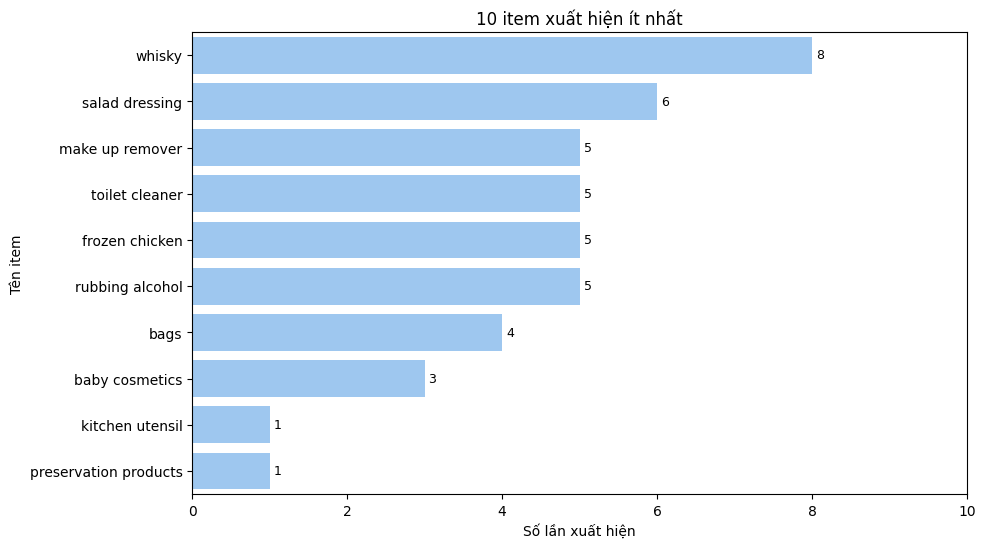

In [ ]:
# Biểu diễn trực quan
plt.figure(figsize=(10, 6))
plt.xlim(0, 10)
chart = sns.barplot(x=bottom10_item.values, y=bottom10_item.index, alpha=0.8, color=sns.xkcd_rgb['sky blue'])
for index, value in enumerate(bottom10_item.values):
    chart.text(value + 0.05, index, str(value), va='center', fontsize = 9)
plt.title('10 item xuất hiện ít nhất')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Tên item')
plt.show()

## ***2.2. Khám phá biến `Member_number`***

*Top 10 khách hàng xuất hiện nhiều nhất*

In [ ]:
# Tổng số lượng khách hàng
customer_num = df['Member_number'].nunique()
# Tổng số lần mua hàng của tất cả khách hàng
purchase_num = df['Member_number'].count()
print(f'Tập dữ liệu này có {item_num} khách hàng với tổng số {purchase_num} lượt mua hàng')
print(f'Bình quân mỗi khách hàng mua {(purchase_num/customer_num):.2f} lần/ đầu người')

Tập dữ liệu này có 167 khách hàng với tổng số 38765 lượt mua hàng
Bình quân mỗi khách hàng mua 9.94 lần/ đầu người


In [ ]:
# Top 10 khách hàng mua nhiều nhất
top10_customer = df['Member_number'].value_counts().head(10)
top10_customer

3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: Member_number, dtype: int64

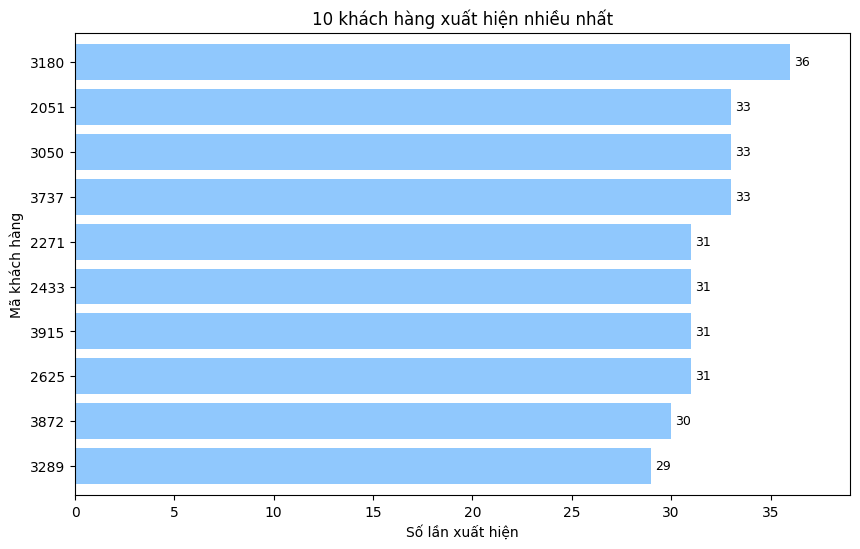

In [ ]:
# Biểu diễn trực quan
plt.figure(figsize=(10, 6))
plt.xlim(0, 39)
sorted_top10cus = top10_customer.sort_values(ascending=True)
chart = sorted_top10cus.plot.barh(width=0.8, alpha=0.8, color=sns.xkcd_rgb['sky blue'])
for index, value in enumerate(sorted_top10cus.values):
    chart.text(value + 0.2, index, str(value), va='center', fontsize = 9)
plt.title('10 khách hàng xuất hiện nhiều nhất')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Mã khách hàng')
plt.show()

In [ ]:
# Top 10 khách hàng mua ít nhất
bottom10_customer = df['Member_number'].value_counts().tail(10)
bottom10_customer

2735    2
3949    2
2304    2
4844    2
4386    2
2503    2
3301    2
1775    2
3723    2
2417    2
Name: Member_number, dtype: int64

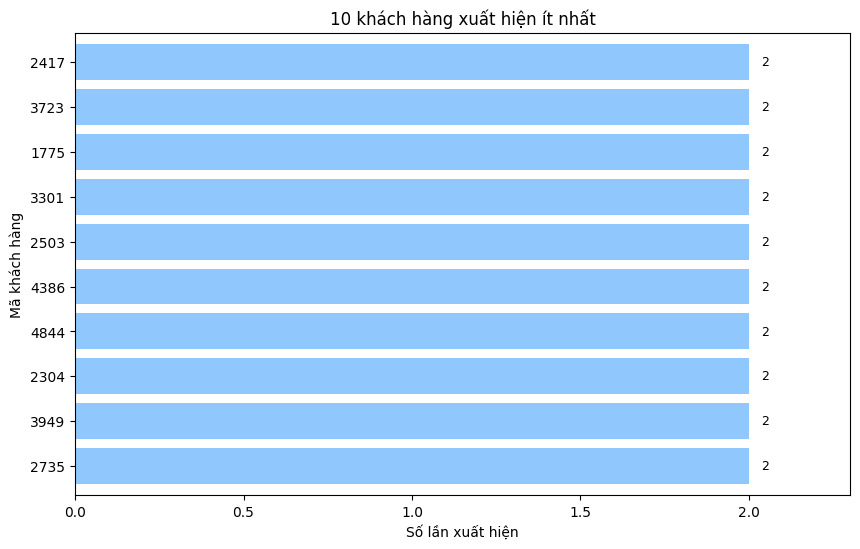

In [ ]:
# Biểu diễn trực quan
plt.figure(figsize=(10, 6))
plt.xlim(0, 2.3)
sorted_bottom10cus = bottom10_customer.sort_values(ascending=True)
chart = sorted_bottom10cus.plot.barh(width=0.8, alpha=0.8, color=sns.xkcd_rgb['sky blue'])
for index, value in enumerate(sorted_bottom10cus.values):
    chart.text(value + 0.035, index, str(value), va='center', fontsize = 9)
plt.title('10 khách hàng xuất hiện ít nhất')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Mã khách hàng')
plt.show()

##***2.3. Khám phá biến `Date`***

In [ ]:
dateindex_df = df.set_index(['Date'])
dateindex_df

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


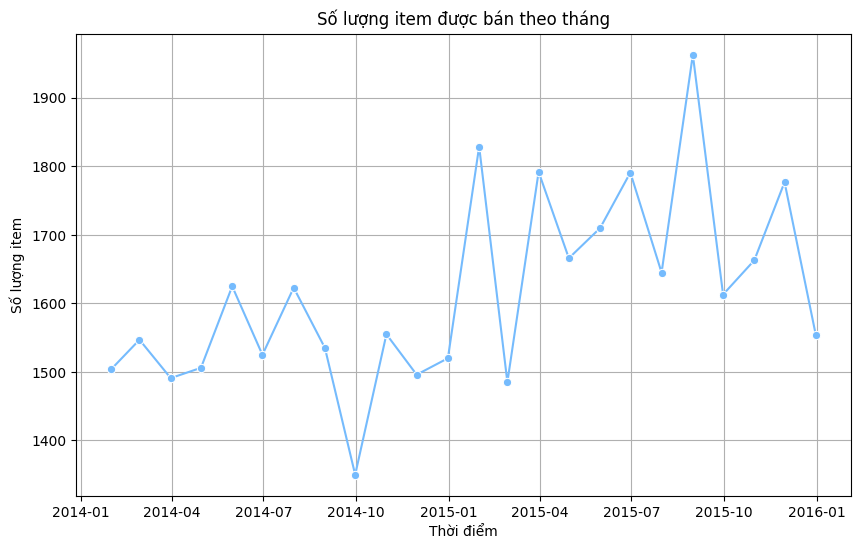

In [ ]:
# Biểu diễn trực quan
plt.figure(figsize=(10, 6))
sns.lineplot(data=dateindex_df.resample('M')['itemDescription'].count(),
             marker='o', color=sns.xkcd_rgb['sky blue'])
plt.title('Số lượng item được bán theo tháng')
plt.xlabel('Thời điểm')
plt.ylabel('Số lượng item')
plt.grid(True)
plt.show()

#**CHỈNH DẠNG DỮ LIỆU**

##***3.1. Gom nhóm vật phẩm***

In [ ]:
# Tạo bản sao
eclat_df = df.copy()

In [ ]:
group = {
    # subgroup cho nhóm thực phẩm
    'fruit': ['tropical fruit', 'pip fruit', 'citrus fruit', 'canned fruit', 'frozen fruits', 'berries',
              'grapes', 'tidbits'],
    'vegetables': ['other vegetables', 'root vegetables', 'pickled vegetables', 'frozen vegetables',
                   'canned vegetables', 'specialty vegetables', 'frozen potato products', 'onions'],
    'grains': ['brown bread', 'rice', 'pastry', 'pasta', 'long life bakery product', 'white bread', 'waffles',
               'potato products', 'semi-finished bread', 'zwieback', 'roll products', 'cereals'],
    'meats': ['frankfurter', 'chicken','sausage', 'hamburger meat', 'pork', 'ham', 'turkey', 'frozen meals',
              'fish', 'meat', 'frozen chicken', 'frozen fish', 'canned fish', 'liver loaf', 'organic sausage',
              'meat spreads', 'frozen chicken'],
    'dairy': ['butter', 'yogurt', 'curd cheese', 'processed cheese', 'curd', 'hard cheese', 'cream cheese ',
              'sliced cheese', 'specialty cheese', 'spread cheese', 'soft cheese'],
    'sugary': ['chocolate', 'specialty bar', 'popcorn', 'dessert', 'specialty chocolate', 'ice cream',
               'honey', 'frozen dessert', 'chewing gum', 'jam', 'chocolate marshmallow', 'sweet spreads',
               'cooking chocolate', 'syrup', 'candy', 'cake bar'],
    'seasoning': ['sugar', 'herbs', 'salt', 'baking powder', 'vinegar', 'artif. sweetener', 'spices',
                  'pudding powder', 'sauces', 'mustard', 'mayonnaise', 'seasonal products', 'ketchup',
                  'salad dressing'],
    'other foods': ['cream', 'flour', 'margarine', 'salty snack', 'domestic eggs', 'nuts/prunes', 'soups',
                    'specialty fat', 'snack products', 'whipped/sour cream', 'nut snack', 'Instant food products',
                    'organic products', 'ready soups', 'preservation products', 'flower (seeds)',
                    'packaged fruit/vegetables'],

    # subgroup cho nhóm đồ uống
    'milk': ['UHT-milk', 'condensed milk', 'butter milk', 'whole milk'],
    'juice': ['fruit/vegetable juice'],
    'energy drinks': ['instant coffee', 'coffee', 'soda', 'soft drinks'],
    'water': ['bottled water'],
    'alcohol': ['red/blush wine', 'white wine', 'bottled beer', 'liqueur', 'whisky', 'brandy', 'white wine',
                'rum', 'misc. beverages', 'canned beer', 'sparkling wine', 'prosecco', 'liquor (appetizer)',
                'liqueur (appetizer)', 'liquor'],
    'other drinks': ['tea', 'cocoa drinks', 'beverages'],

    # subgroup cho nhóm còn lại
    'pet care': ['dog food', 'pet care', 'cat food'],
    'chemistry products': ['detergent', 'decalcifier', 'bathroom cleaner', 'abrasive cleaner', 'rubbing alcohol',
                           'softener', 'toilet cleaner'],
    'bags': ['shopping bags', 'cling film/bags', 'bags'],
    'cosmetics': ['skin care', 'male cosmetics', 'make up remover', 'hair spray', 'female sanitary products',
                  'hygiene articles', 'baby cosmetics', 'dental care'],
    'house facilities': ['kitchen utensil', 'cleaner', 'dish cleaner', 'house keeping products', 'cookware'],
    'others': ['newspapers', 'finished products', 'pot plants', 'photo/film', 'soap', 'light bulbs', 'napkins',
               'kitchen towels', 'flower soil/fertilizer', 'dishes', 'candles']
}

eclat_df['group_itemDescription'] = eclat_df['itemDescription'].apply(lambda x: next((key for key,
                                                                      value in group.items() if x in value), 'other item'))

In [ ]:
properties_chk(eclat_df)

,Số quan sát,Số giá trị unique,Kiểu dữ liệu
Member_number,38765,3898,int64
Date,38765,728,datetime64[ns]
itemDescription,38765,167,object
group_itemDescription,38765,21,object


In [ ]:
null_chk(eclat_df)

,Số quan sát,Số giá trị rỗng,Phần trăm rỗng
Member_number,38765,0,0.00%
Date,38765,0,0.00%
itemDescription,38765,0,0.00%
group_itemDescription,38765,0,0.00%


In [ ]:
eclat_groupitems = eclat_df.copy()
eclat_nongroupitems = eclat_df.copy()
eclat_groupitems

,Member_number,Date,itemDescription,group_itemDescription
0,1808,2015-07-21,tropical fruit,fruit
1,2552,2015-05-01,whole milk,milk
2,2300,2015-09-19,pip fruit,fruit
3,1187,2015-12-12,other vegetables,vegetables
4,3037,2015-01-02,whole milk,milk
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,dairy
38761,2022,2014-02-23,candy,sugary
38762,1097,2014-04-16,cake bar,sugary
38763,1510,2014-03-12,fruit/vegetable juice,juice


##***3.2. Xử lý đơn hàng bị trùng***

###3.2.1. Không gom nhóm sản phẩm

In [ ]:
# Xử lý định dạng ngày tháng thành dạng chuỗi (mmyyyy)
eclat_nongroupitems['Date'] = pd.to_datetime(eclat_nongroupitems['Date']).dt.strftime('%m%Y')
eclat_nongroupitems['Date'].head(5)

0    072015
1    052015
2    092015
3    122015
4    012015
Name: Date, dtype: object

In [ ]:
# Kết hợp cột Member_number và Date thành một cột invoice
eclat_nongroupitems['invoice'] = eclat_nongroupitems['Member_number'].astype(str) + '_' + eclat_nongroupitems['Date']
eclat_nongroupitems = eclat_nongroupitems.drop(columns=['Member_number', 'Date', 'group_itemDescription'])
eclat_nongroupitems['invoice'].head(5)

0    1808_072015
1    2552_052015
2    2300_092015
3    1187_122015
4    3037_012015
Name: invoice, dtype: object

In [ ]:
# Xử lý trùng lặp ở cột invoice bằng cách dồn các giá trị của cột itemDescription thành tập hợp duy nhất
eclat_nongroupitems = eclat_nongroupitems.groupby('invoice')['itemDescription'].apply(set).reset_index()
eclat_nongroupitems.head(10)

,invoice,itemDescription
0,1000_032015,"{whole milk, semi-finished bread, yogurt, saus..."
1,1000_052015,"{soda, pickled vegetables}"
2,1000_062014,"{salty snack, pastry, whole milk}"
3,1000_072015,"{canned beer, misc. beverages}"
4,1000_112015,"{hygiene articles, sausage}"
5,1001_012015,"{frankfurter, whipped/sour cream, soda}"
6,1001_022015,"{frankfurter, curd}"
7,1001_042015,"{white bread, beef}"
8,1001_072014,"{whole milk, rolls/buns, sausage}"
9,1001_122014,"{soda, whole milk}"


In [ ]:
# Thông tin bộ dữ liệu sau xử lý
eclat_nongroupitems.info()
dup_test = eclat_nongroupitems.copy()

# Kiểm tra xem có dòng dữ liệu nào trùng nhau không
dup_test['itemDescription'] = dup_test['itemDescription'].apply(','.join)
duplicates = dup_test[dup_test.duplicated()]

# Hiển thị các dòng dữ liệu trùng nhau
if not duplicates.empty:
    print("\nCác dòng dữ liệu trùng nhau:")
    print(duplicates)
else:
    print("\nKhông có dòng dữ liệu nào trùng nhau.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   invoice          13877 non-null  object
 1   itemDescription  13877 non-null  object
dtypes: object(2)
memory usage: 217.0+ KB

Không có dòng dữ liệu nào trùng nhau.


###3.2.2. Gom nhóm sản phẩm

In [ ]:
# Xử lý định dạng ngày tháng thành dạng chuỗi (mmyyyy)
eclat_groupitems['Date'] = pd.to_datetime(eclat_groupitems['Date']).dt.strftime('%m%Y')
eclat_groupitems['Date'].head(5)

0    072015
1    052015
2    092015
3    122015
4    012015
Name: Date, dtype: object

In [ ]:
# Kết hợp cột Member_number và Date thành một cột invoice
eclat_groupitems['invoice'] = eclat_groupitems['Member_number'].astype(str) + '_' + eclat_groupitems['Date']
eclat_groupitems = eclat_groupitems.drop(columns=['Member_number', 'Date'])
eclat_groupitems['invoice'].head(5)

0    1808_072015
1    2552_052015
2    2300_092015
3    1187_122015
4    3037_012015
Name: invoice, dtype: object

In [ ]:
# Xử lý trùng lặp ở cột invoice bằng cách dồn các giá trị của cột itemDescription thành tập hợp duy nhất
eclat_groupitems = eclat_groupitems.groupby('invoice')['group_itemDescription'].apply(set).reset_index()
eclat_groupitems.head(10)

,invoice,group_itemDescription
0,1000_032015,"{meats, grains, milk, dairy}"
1,1000_052015,"{energy drinks, vegetables}"
2,1000_062014,"{grains, milk, other foods}"
3,1000_072015,{alcohol}
4,1000_112015,"{meats, cosmetics}"
5,1001_012015,"{meats, energy drinks, other foods}"
6,1001_022015,"{meats, dairy}"
7,1001_042015,"{grains, other item}"
8,1001_072014,"{meats, milk, other item}"
9,1001_122014,"{energy drinks, milk}"


In [ ]:
# Thông tin bộ dữ liệu sau xử lý
eclat_groupitems.info()
dup_test = eclat_groupitems.copy()

# Kiểm tra xem có dòng dữ liệu nào trùng nhau không
dup_test['group_itemDescription'] = dup_test['group_itemDescription'].apply(','.join)
duplicates = dup_test[dup_test.duplicated()]

# Hiển thị các dòng dữ liệu trùng nhau
if not duplicates.empty:
    print("\nCác dòng dữ liệu trùng nhau:")
    print(duplicates)
else:
    print("\nKhông có dòng dữ liệu nào trùng nhau.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice                13877 non-null  object
 1   group_itemDescription  13877 non-null  object
dtypes: object(2)
memory usage: 217.0+ KB

Không có dòng dữ liệu nào trùng nhau.


#**LƯU DATA**

In [ ]:
eclat_groupitems.to_csv(folder + '/Groceries 1_Group.csv', index=False) #Gom nhóm sản phẩm
eclat_nongroupitems.to_csv(folder + '/Groceries 1_NonGroup.csv', index=False) #Không gom nhóm sản phẩm